### **Name:___<ins>Alejandro López Vázquez</ins>____ Your ID: _<ins>A01171715</ins>_**

### Please answer the following questions about knowledge discovery and pattern finding in datasets. Please prepare a single pdf document with all of your answers, including notebooks for each of the questions below.

### 1. **CRISP-DM (5 points).** Customer churning is a problem faced by many companies and consists in losing profitable clients that prefer to become customers of a company’s competitor that presumably, provides better service. This may represent important revenue losses for a company that includes banks and other business sectors.<br> Consider the information provided by a bank in the attached dataset (Churn_Modelling.csv) and apply the CRISP-DM methodology to understand the problem from a business standpoint and try to answer the following business questions to counteract customer churning: 

### a. Prepare a Jupiter notebook (JNB) where you explain and analyze the main outcomes of each of the six steps of the CRISP-DM methodology.
       

### 1. Business Understanding

The bank wants to reduce churning 
Basically, expectation of the bank, which customer could be churn and how modelling data of customer of the bank. In line with this expectation, main objective detects customers that could be leave from there.

### 2. Data Understanding


In [171]:
"""Data Preparation Library"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

"""Models Library"""
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

"""Model Evaluation"""
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

"""Other"""
import os
import warnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category = ConvergenceWarning)

In [172]:
# Importing dataset
dt = pd.read_csv("Churn_Modelling(1).csv")

# First 5 rows of data
dt.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


This dataset belongs to the bank that is hidden its name because of data security. The dataset consists of 13 attributes and 10,000 rows. The following shows description of attributes.

    1. Customer ID: This attribute is unique and assume that primary key
    2-Surname: it belongs to surname of customer and string values
    3. Geography: it shows country of customer
    4. Gender: male/female
    5. Credit Score: it gives credit score of customers. That score calculates interbank system. High score shows that the customer debt high repayment capacity.
    6. Age: age of customers
    7. Tenure: The number of ages the customer is in the bank.
    8. Balance: Customer's money in the bank.
    9. Number of Products: Number of products owned by the customer.
    10. Credit Card: Whether the customer has a credit card
    11. Active Status: Customer's presence in the bank
    12. Estimated Salary: Customer's estimated salary
    13. Exited: Churn or not


### 3. Data Preparation

Remove unneeded columns which are RowNumber, CustomerId and Surnmae

In [173]:
dt = dt.drop(columns=["RowNumber","CustomerId","Surname"])
dt.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




There is unique 10.000 customers. Geography and gender are categorical variables. Geography consist of France (%50), Germany (%25) and Spain (%25). Also, gender contain %54 male and %46 female.

Basic description for continuous variables


In [174]:


dt.describe()



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000




Above table (basic statical description)shows descriptive statistics of continuous variables from original data. Credit score is between 350 and 850. The average age of the customers is 39. Tenure is maximum ten years which assume age of the bank. Minimum value and first quantiles of Balance are equal 0 which means the distribution may not be normal.




Missing values checking


In [175]:
pd.DataFrame(dt.isnull().sum(),columns=["Count"])

,Count
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0




Exited column that is flag to define for customers whether churn (%80) or not (%20). Thus, target feature is determined. Other features allow the predictor to classify the value of the target variable. For this reason, the relationship between the target column and other columns is examined in the following visualizations


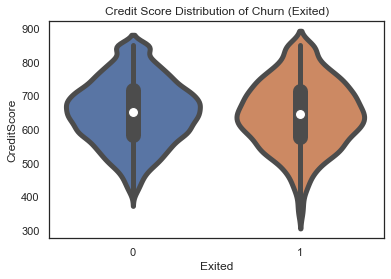

In [176]:
# Exited -- CreditScore
sns.violinplot( x=dt["Exited"], y=dt["CreditScore"], linewidth=5)
plt.title("Credit Score Distribution of Churn (Exited)")
plt.show()

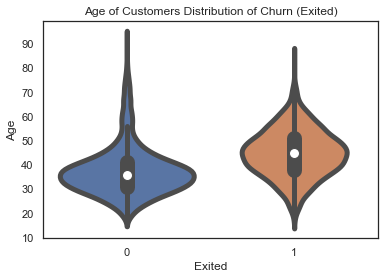

In [177]:


# Exited -- Age
sns.violinplot( x=dt["Exited"], y=dt["Age"], linewidth=5)
plt.title("Age of Customers Distribution of Churn (Exited)")
plt.show()



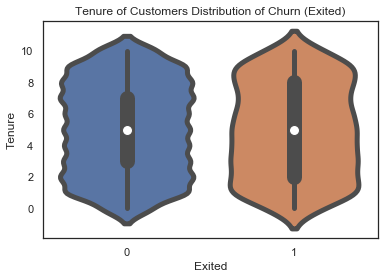

In [178]:
# Exited -- Tenure
sns.violinplot( x=dt["Exited"], y=dt["Tenure"], linewidth=5)
plt.title("Tenure of Customers Distribution of Churn (Exited)")
plt.show()

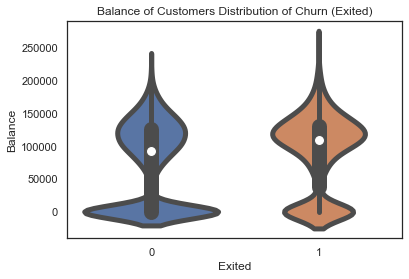

In [179]:
# Exited -- Balance
sns.violinplot( x=dt["Exited"], y=dt["Balance"], linewidth=5)
plt.title("Balance of Customers Distribution of Churn (Exited)")
plt.show()

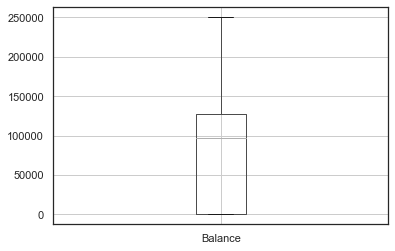

In [180]:
# Balance boxplot
dt[["Balance"]].boxplot();

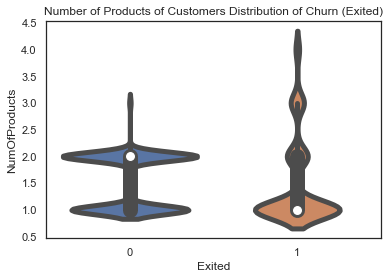

In [181]:
# Exited -- NumOfProducts
sns.violinplot( x=dt["Exited"], y=dt["NumOfProducts"], linewidth=5)
plt.title("Number of Products of Customers Distribution of Churn (Exited)")
plt.show()

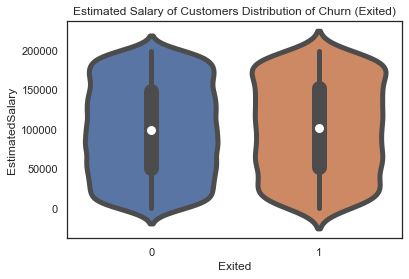

In [182]:
# Exited -- EstimatedSalary
sns.violinplot( x=dt["Exited"], y=dt["EstimatedSalary"], linewidth=5)
plt.title("Estimated Salary of Customers Distribution of Churn (Exited)")
plt.show()



Above figures shows the relationship between six continuous variables and target variable in the form of violin graph. Balance, Tenure, Estimated Salary and Credit score almost appear to be irregular for both churn and not churn. Customers who churn higher age than other. Churn customers When the product numbers are examined; could be interpreted by looking at the graph that customers reduce their products before leaving.

The following figure in the correlation between the six variables, there is no significant value between any two variables. Only a negative relationship exists between Balance and Number of Product


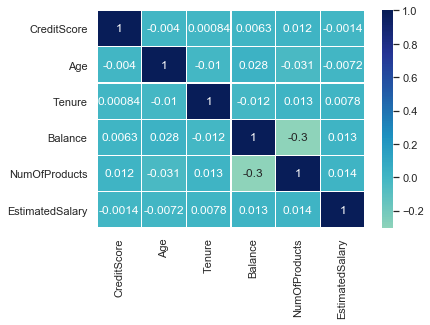

In [183]:
# Correlation Matrix
correlationColumns = dt[["CreditScore","Age","Tenure"
    ,"Balance","NumOfProducts","EstimatedSalary"]]

sns.set()
corr = correlationColumns.corr()
ax = sns.heatmap(corr
                 ,center=0
                 ,annot=True
                 ,linewidths=.2
                 ,cmap="YlGnBu")
plt.show()


3. DATA PREPARATION

Since there is a target variable in data of the Bank, classification is made by following the supervised learning method. First, to define which target variable is the model, the target variable and the other variables are separated from each other (Exited and other). Customer ID, Row Number and Surname variables are excluded from the data set because they cannot be input for the model,


In [184]:
# Decomposition predictors and target
predictors = dt.iloc[:,0:10]
target = dt.iloc[:,10:]

The characters in the gender variable are replaced with 0 or 1.

In [185]:
try:
    predictors['isMale'] = predictors['Gender'].map({'Male':1, 'Female':0})
except:
    pass



Dummy variables was reconstructed as 1 or 0 for the three values in the Geography data. Therefore, three different variables were formed. However, the third variable was excluded from the data since two variables included in all three cases.


In [186]:
try:
    # Geography one shot encoder
    predictors[['France', 'Germany', 'Spain']] = pd.get_dummies(predictors['Geography'])
    # Removal of unused columns.
    predictors = predictors.drop(columns=['Gender','Geography','Spain'])
except:
    pass



Modelling preparation applies transformation methodology. Three variables (Credit Score, Estimated Salary and Balance) were transformed by normalizing. All values in the variables are represented between 1 and 0.


In [187]:
normalization = lambda x:(x-x.min()) / (x.max()-x.min())
transformColumns = predictors[["Balance","EstimatedSalary","CreditScore"]]
predictors[["Balance","EstimatedSalary","CreditScore"]] = normalization(transformColumns)

# All Predictors Columns
predictors.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,isMale,France,Germany
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.601058,38.921800,5.012800,0.304848,1.530200,0.70550,0.515100,0.500441,0.545700,0.501400,0.250900
std,0.193307,10.487806,2.892174,0.248696,0.581654,0.45584,0.499797,0.287580,0.497932,0.500023,0.433553
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.468000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000,0.000000,0.000000
50%,0.604000,37.000000,5.000000,0.387402,1.000000,1.00000,1.000000,0.500960,1.000000,1.000000,0.000000
75%,0.736000,44.000000,7.000000,0.508749,2.000000,1.00000,1.000000,0.746955,1.000000,1.000000,1.000000
max,1.000000,92.000000,10.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000




In order to measure the accuracy rate in the modeling, the data set was divided into test and train.


In [188]:
# Train and test splitting
x_train,x_test,y_train,y_test = train_test_split(predictors,target,test_size=0.25, random_state=0)
pd.DataFrame({"Train Row Count":[x_train.shape[0],y_train.shape[0]],
              "Test Row Count":[x_test.shape[0],y_test.shape[0]]},
             index=["X (Predictors)","Y (Target)"])

,Train Row Count,Test Row Count
X (Predictors),7500,2500
Y (Target),7500,2500


After all these preparations, the dataset is made ready for modeling which is another step of CRISP-DM method.


### 4. MODELING

After the pre-processing of the data, one or multiple specific modelling techniques, which are connected to the data mining goal, are selected and data could be modelled. In order to test cogency and the quality of the model, a procedure should be created before the model is built. Afterward, in order to produce one or more models, the modelling tool could start running on the ready set of data.


In [189]:


# Numpy excaptions handle
y_train = y_train.values.ravel()



In [190]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)
dtc_acc = accuracy_score(y_test,y_pred_dtc)

# Logistic Regression
logr = LogisticRegression()
logr.fit(x_train,y_train)
y_pred_logr = logr.predict(x_test)
logr_acc = accuracy_score(y_test,y_pred_logr)

# Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
gnb_acc = accuracy_score(y_test,y_pred_gnb)

# K Neighbors Classifier
knn = KNeighborsClassifier( metric='minkowski')
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
knn_acc = accuracy_score(y_test,y_pred_knn)

# Random Forrest
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test,y_pred_rfc)

# Neural Network
nnc = MLPClassifier()
nnc.fit(x_train,y_train)
y_pred_nnc = nnc.predict(x_test)
nnc_acc = accuracy_score(y_test,y_pred_nnc)

# Xgboost Classifier
xgboast = xgb.XGBClassifier(use_label_encoder=False)
xgboast.fit(x_train, y_train)
xgboast = xgboast.score(x_test,y_test)

pd.DataFrame({"Algorithms":["Decision Tree","Logistic Regression","Naive Bayes","K Neighbors Classifier","Random Ferest","Neural Network","Xgboost Classifier"],
              "Scores":[dtc_acc,logr_acc,gnb_acc,knn_acc,rfc_acc,nnc_acc,xgboast]})

[12:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Algorithms,Scores
0,Decision Tree,0.7952
1,Logistic Regression,0.8068
2,Naive Bayes,0.8096
3,K Neighbors Classifier,0.8272
4,Random Ferest,0.8676
5,Neural Network,0.8392
6,Xgboost Classifier,0.8552


When the accuracy of all models is compared, it is seen that XGBoost algorithm is higher (%86)


### 5. EVALUATION

In the evaluation stage, the obtained model obtained should evaluated more carefully and the steps while building the model should review in order to be sure that the model appropriately achieves the business objectives.


In [191]:
# Cross validation test
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('xgboast', XGBClassifier(use_label_encoder=False)))

# evaluate each model in turning kfold results
results_boxplot = []
names = []
results_mean = []
results_std = []
p,t = predictors.values, target.values.ravel()
for name, model in models:
    cv_results = cross_val_score(model, p,t, cv=10)
    results_boxplot.append(cv_results)
    results_mean.append(cv_results.mean())
    results_std.append(cv_results.std())
    names.append(name)
pd.DataFrame({"Algorithm":names,
                                "Accuracy Mean":results_mean,
                                "Accuracy":results_std})

[12:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Algorithm,Accuracy Mean,Accuracy
0,LR,0.8099,0.007314
1,KNN,0.8284,0.009881
2,CART,0.7920,0.015962
3,RFC,0.8637,0.006388
4,NB,0.8205,0.007487
5,SVM,0.7963,0.000458
6,xgboast,0.8551,0.006625


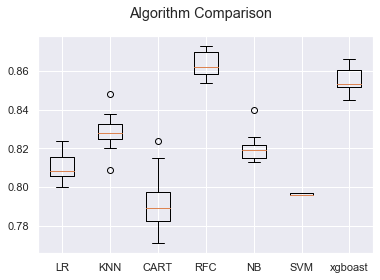

In [192]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results_boxplot)
ax.set_xticklabels(names)
plt.show()



Using the cross-validation method, different train and test sets were created and the model re-run iteratively and the result was increased from 86% to 87%. The accuracy of different algorithms was compared with the application of cross validation method.


In [193]:
#Grid Seach for XGboast
params = {
        'min_child_weight': [1, 2, 3],
        'gamma': [1.9, 2, 2.1, 2.2],
        'subsample': [0.4,0.5,0.6],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3,4,5]
        }
gd_sr = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False),
                     param_grid=params,
                     scoring='accuracy',
                     cv=5,
                     )
gd_sr.fit(predictors, target.values.ravel())
best_parameters = gd_sr.best_params_
pd.DataFrame(best_parameters.values(),best_parameters.keys(),columns=["Best Parameters"])

[12:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Best Parameters
colsample_bytree,0.8
gamma,2.2
max_depth,3.0
min_child_weight,1.0
subsample,0.6


In [194]:


print("Best score is: ",gd_sr.best_score_)



Best score is:  0.8672000000000001



### 6. DEPLOYMENT

The deployment phase requires the consequences of the evaluation to verify a strategy for deployment within a particular company. When the results of the project will be used widely, it is significant that the business should take required actions to use definitely the models. At this phase, final report and presentation of the found results are produced.


(1) what is the likelihood of an active customer leaving the bank? <br>
(2) what are key indicators of a customer churn? <br>
(3) what retention strategies can be implemented based on the results to diminish prospective customer churn?

### b. To construct your JNB, you may want to modify the Python script used in class or adapt your code from the one provided at https://www.kaggle.com/yigitaener/churn-modeling-with-crisp-dm
       

### c. What would you recommend the bank to answer the three business questions stated above?

(1) what is the likelihood of an active customer leaving the bank?

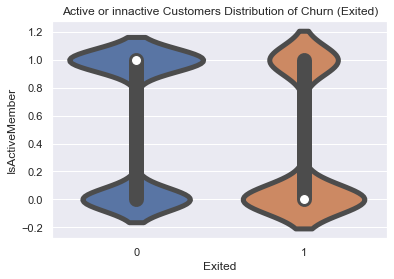

In [195]:
# IsActiveMember -- EstimatedSalary
sns.violinplot( x=dt["Exited"], y=dt["IsActiveMember"], linewidth=5)
plt.title("Active or innactive Customers Distribution of Churn (Exited)")
plt.show()

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


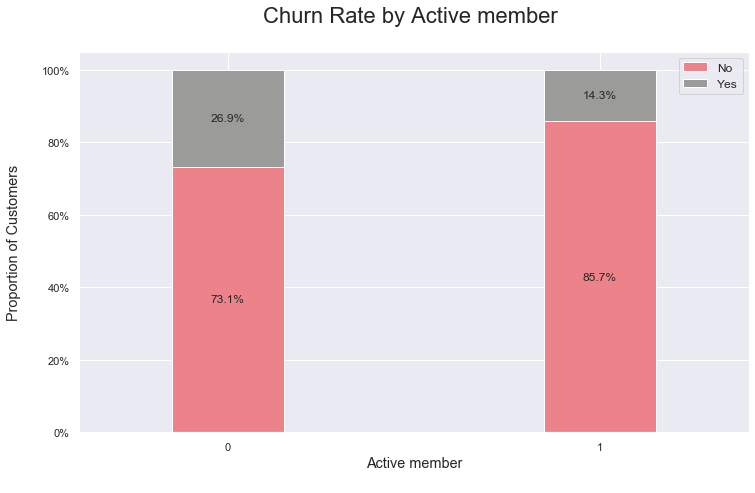

In [199]:
import matplotlib.ticker as mtick
contract_churn = dt.groupby(['IsActiveMember','Exited']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Active member\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Active member \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)

the likelihood of an active member leaving the bank is 14.3%

 (2) what are key indicators of a customer churn? 

In [200]:
dataset2 = dt[['CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'IsActiveMember', 'EstimatedSalary',
        'NumOfProducts', 'HasCrCard']]
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 EstimatedSalary    0.022799
CreditScore        0.012506
Balance            0.001446
dtype: float64

Most Negative Correlations: 
 IsActiveMember   -0.002485
NumOfProducts    -0.004376
Age              -0.006424
Tenure           -0.010031
HasCrCard        -0.027279
dtype: float64


Most Positive Correlations: 
EstimatedSalary    
CreditScore        
Balance            

Most Negative Correlations: 
Age              
Tenure           
HasCrCard        

(3) what retention strategies can be implemented based on the results to diminish prospective customer churn?

As we see, the ones that have a positive correlation are not factors that we can control but they give us a target custumer which we can direct our efforts to. In this case the bank may want to start focusing on young, univeritary people in order to create some sense of loyalty, because it may not be a great custumer at the begining, if we create the sense of loyalty (related to tenure) throughout the years (Age), then we will have a custumer less likely to churn when the factors that we can't control come.

### 2. Model Validation **(5 points)**. Customer churning also appears in the telecommunications sector. Also, consider the information provided by a telecom company in the attached dataset (churning.csv) and apply model validation methods to answer the same business questions to counteract customer churning: 
      


 a. Prepare a Jupiter notebook (JNB) where you explain and analyze the model validation techniques used in this case (DT, LR, NB, KNN, RF, NN, XGB).
      

In [94]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

In [95]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [135]:
dataset = pd.read_csv('churning.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [137]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [138]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [139]:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [140]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [141]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [142]:
#Unique values in each categorical variable:dataset["PaymentMethod"].nunique()dataset["PaymentMethod"].unique()dataset["Contract"].nunique()dataset["Contract"].unique()

In [143]:
dataset["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [144]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float")

In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [146]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [147]:
na_cols = dataset.isna().any()
na_cols = na_cols[na_cols == True].reset_index()
na_cols = na_cols["index"].tolist()
for col in dataset.columns[1:]:
     if col in na_cols:
        if dataset[col].dtype != 'object':
             dataset[col] =  dataset[col].fillna(dataset[col].mean()).round(0)

In [148]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [149]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


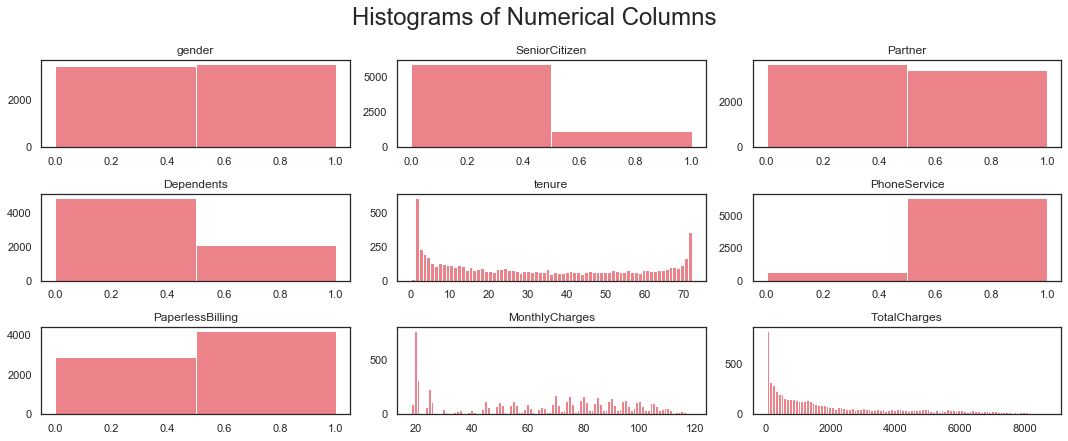

In [150]:
dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner','Dependents','tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges', 'TotalCharges']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


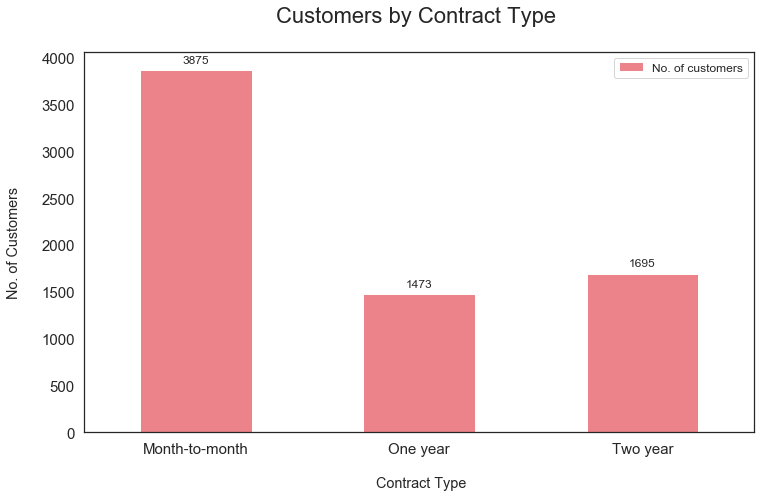

In [151]:
contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split .groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)

plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Customers by Contract Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)  
        
add_value_labels(ax)

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


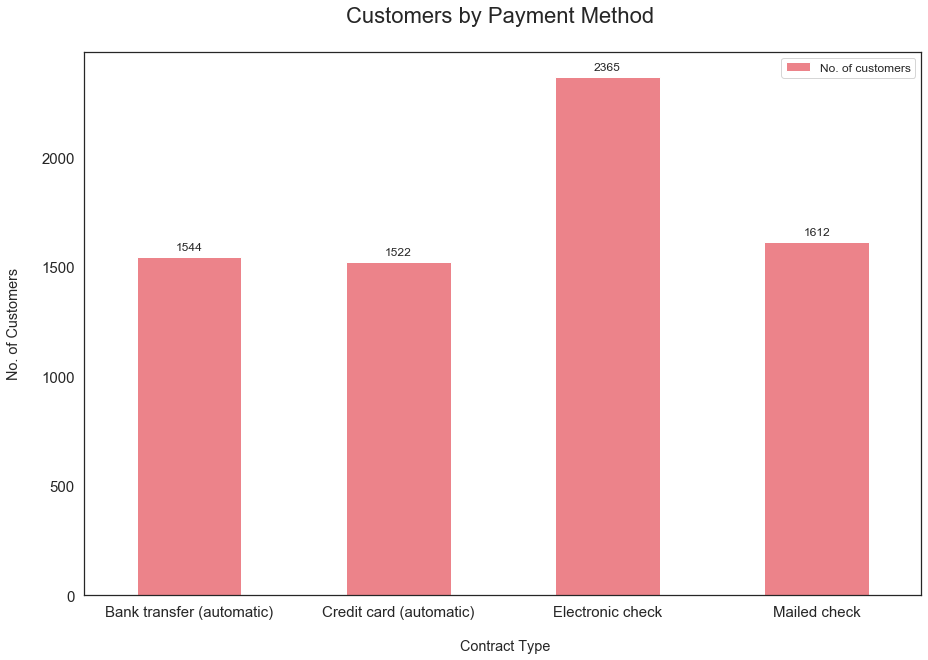

In [152]:
payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

ax =  payment_method_split [["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10),color ='#ec838a', fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Customers by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split [["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)
     
        ax.annotate(label,
        (x_value, y_value),         
        xytext=(0, space),textcoords="offset points", 
        ha='center',va=va)
add_value_labels(ax)

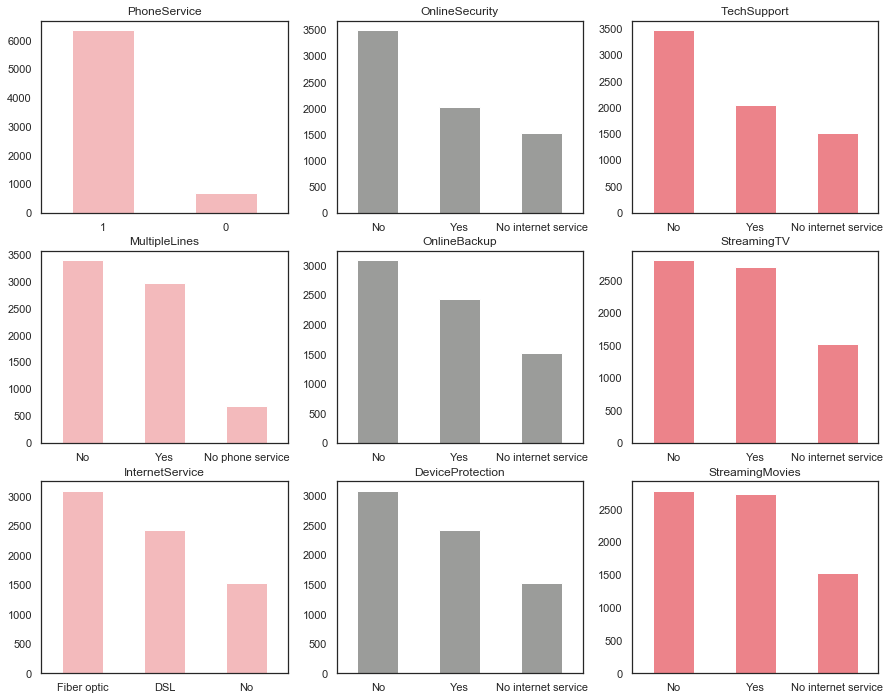

In [153]:
services= ['PhoneService','MultipleLines',
'InternetService','OnlineSecurity',  'OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows = 3,ncols = 3,
figsize = (15,12))
for i, item in enumerate(services):    
    if i < 3:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i,0], rot = 0, color ='#f3babc' )
        
    elif i >=3 and i < 6:
        ax = dataset[item].value_counts().plot( kind = 'bar',ax=axes[i-3,1], rot = 0,color ='#9b9c9a')
        
    elif i < 9:
        ax = dataset[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2], rot = 0, color = '#ec838a')
    ax.set_title(item)

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


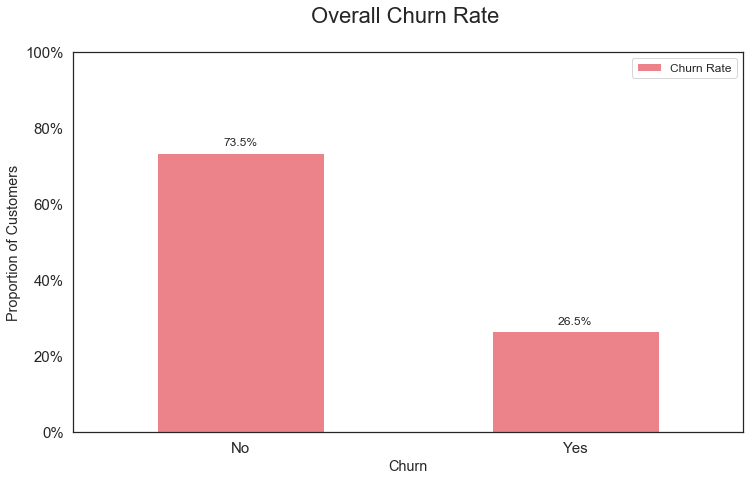

In [154]:
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn", "customerID"]]
churn_rate ["churn_label"] = pd.Series(
np.where((churn_rate["Churn"] == 0), "No", "Yes"))

sectors = churn_rate .groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate ["Churn Rate"] = (
churn_rate ["customerID"]/ sum(churn_rate ["customerID"]) )*100

ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, 
ylim =(0,100))

plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["customerID"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
        ax.annotate(label,(x_value, y_value), xytext=(0, space),textcoords="offset points", ha='center',va=va)

add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


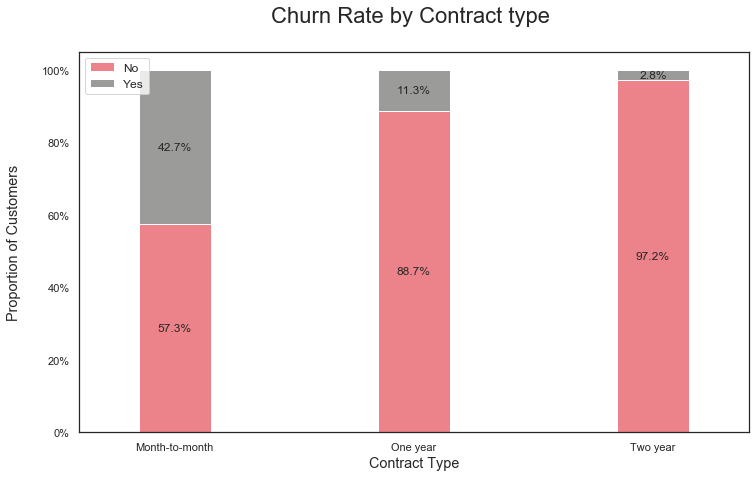

In [155]:
import matplotlib.ticker as mtick
contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


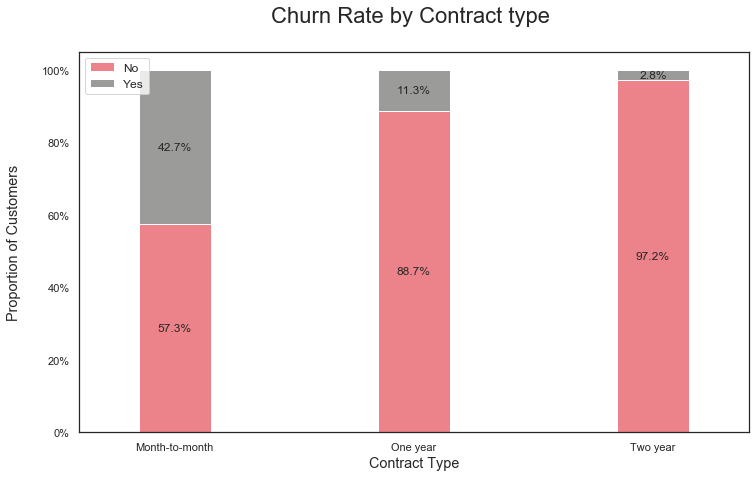

In [156]:
import matplotlib.ticker as mtick
contract_churn = dataset.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


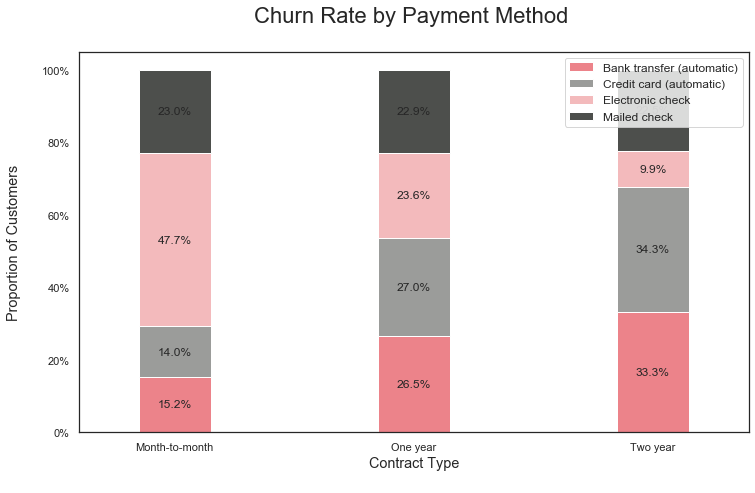

In [157]:
import matplotlib.ticker as mtick
contract_churn = dataset.groupby(['Contract','PaymentMethod']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7), color = colors)
plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [158]:
dataset2 = dataset[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199426
tenure         -0.352229
dtype: float64


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

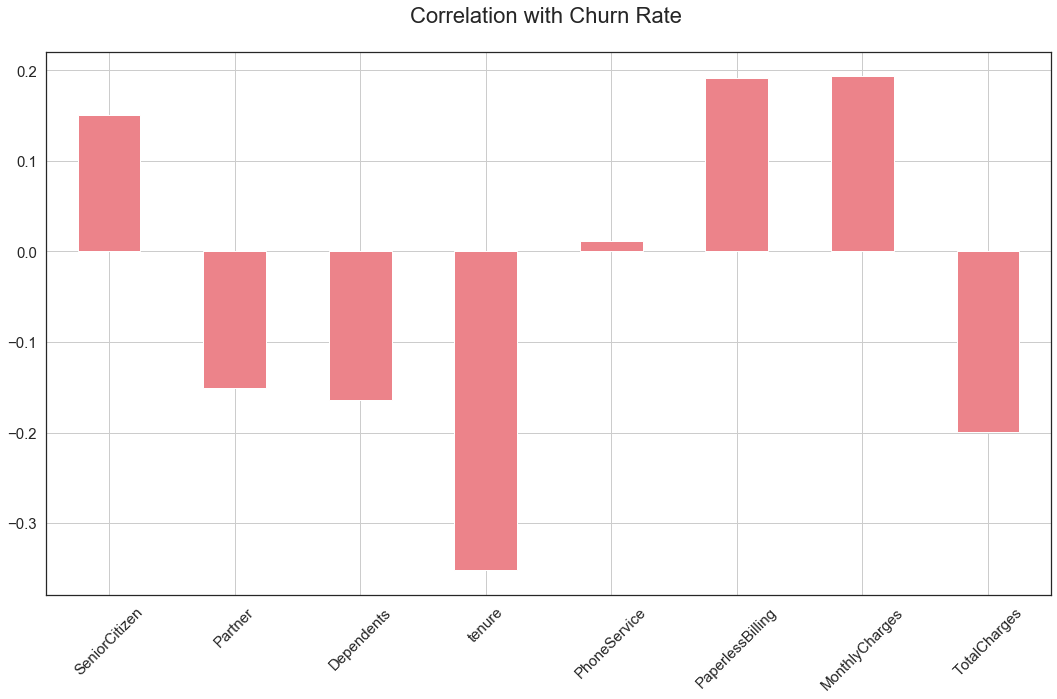

In [120]:
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',horizontalalignment="center", fontstyle = "normal",fontsize = "22", fontfamily = "sans-serif")

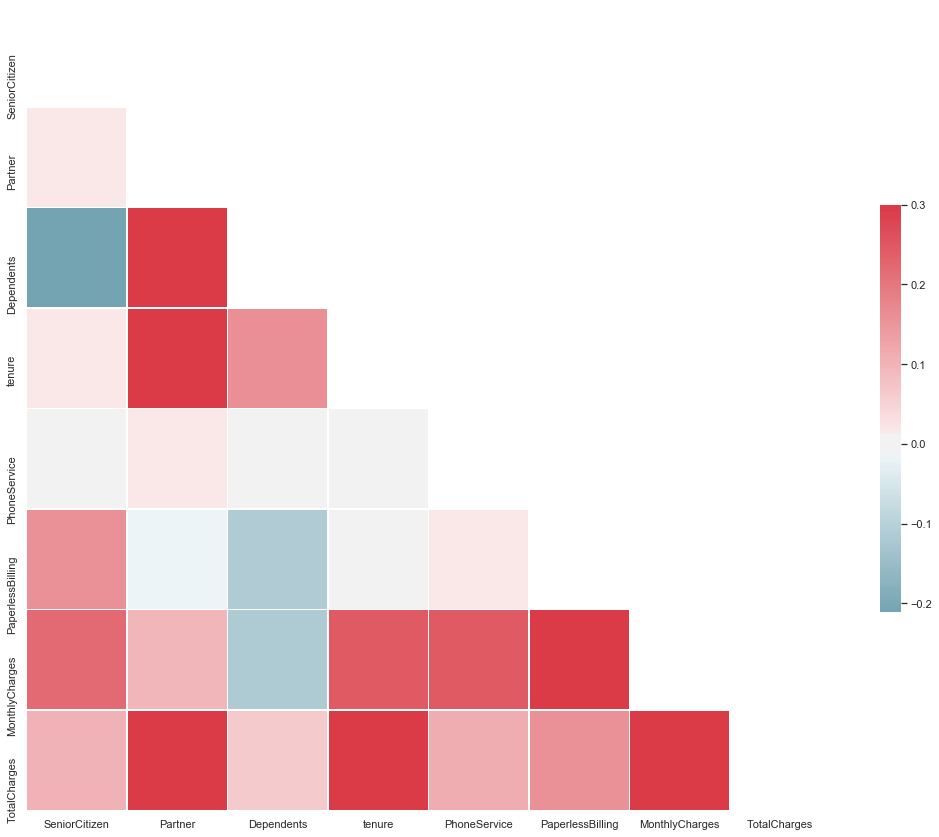

In [121]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = dataset2.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [122]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
dataset2 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]
calc_vif(dataset2)

,variables,VIF
0,gender,1.921286
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549667
5,PhoneService,7.976386
6,PaperlessBilling,2.814160
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269


Text(0.5, 1.0, 'Collinearity of Monthly Charges and Total Charges \n')

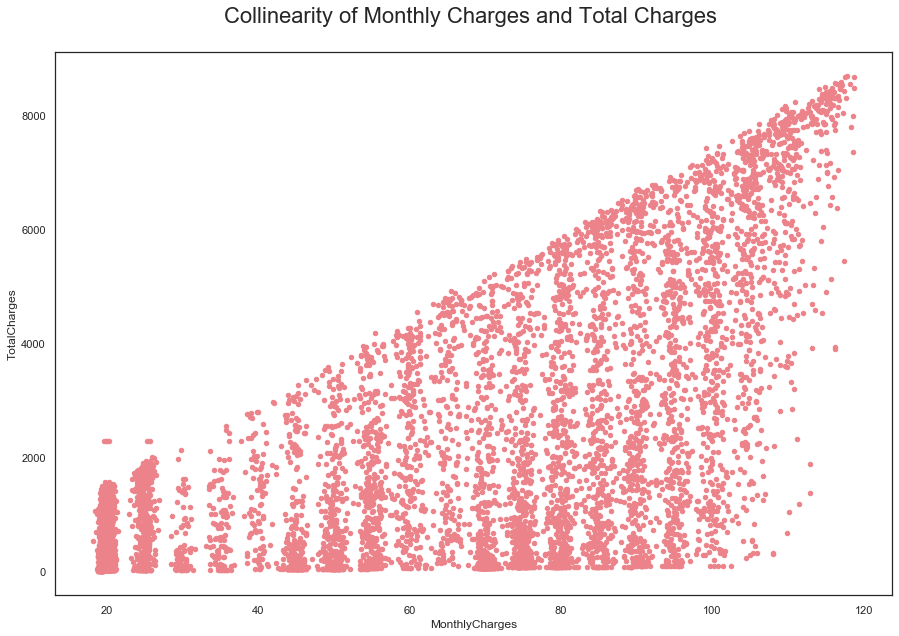

In [123]:

#Check colinearity:
    
dataset2[['MonthlyCharges', 'TotalCharges']].plot.scatter(figsize = (15, 10), x ='MonthlyCharges',y='TotalCharges', color =  '#ec838a')

plt.title('Collinearity of Monthly Charges and Total Charges \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")



In [124]:
#Dropping 'TotalCharges':
    
dataset3 = dataset2.drop(columns = "TotalCharges")

#Revalidate Colinearity:

dataset3 = dataset[['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges']]

calc_vif(dataset3)




,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


In [125]:
#Applying changes in the main dataset:
    
dataset = dataset.drop(columns = "TotalCharges")

In [126]:
#Incase if user_id is an object:
    
identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")
#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)
#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

In [127]:
#Identify response variable:
    
response = dataset["Churn"]
dataset = dataset.drop(columns="Churn")

In [128]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2) 
#use 0.9 if data is huge.random_state = 0
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 40)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 40)
Number transactions y_test dataset:  (1409,)


In [129]:
train_identity = X_train['customerID']
X_train = X_train.drop(columns = ['customerID'])
test_identity = X_test['customerID']
X_test = X_test.drop(columns = ['customerID'])

In [130]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [131]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
# accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score( model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name, round(cv_auc_results.mean()*100, 2), round(cv_auc_results.std()*100, 2),round(cv_acc_results.mean()*100, 2),round(cv_acc_results.std()*100, 2)]
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.62,2.47,75.28,1.92
1,SVC,84.17,2.52,80.39,2.02
4,Gaussian NB,82.30,2.54,68.94,1.55
6,Random Forest,81.75,2.47,78.45,1.59
2,Kernel SVM,79.98,3.23,79.80,2.07
3,KNN,76.92,1.95,76.04,1.20
5,Decision Tree Classifier,67.08,1.87,73.91,1.66


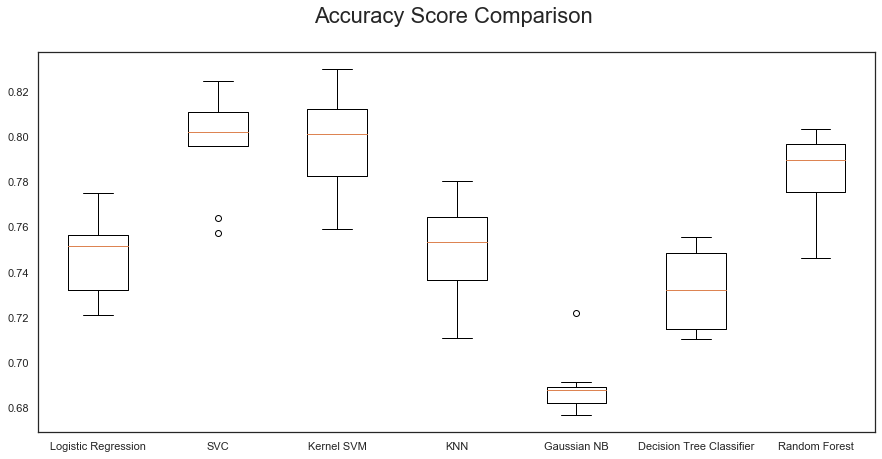

In [90]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Accuracy Score Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

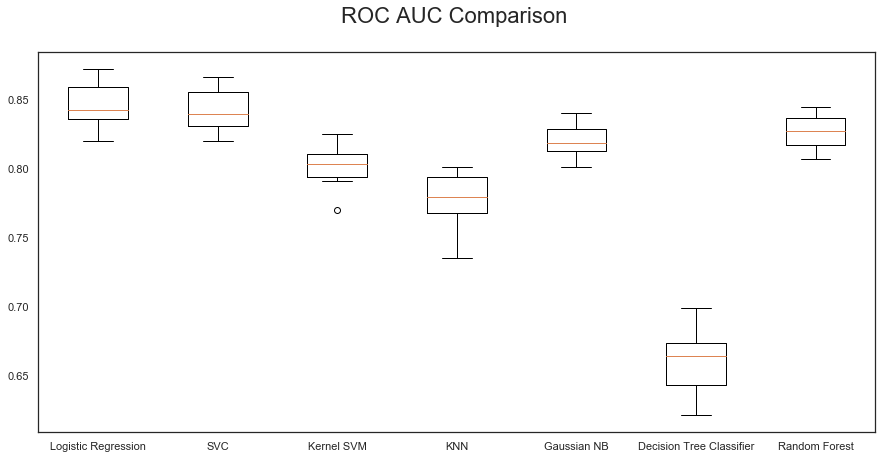

In [260]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
#plt.ylabel('ROC AUC Score\n',horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warn

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

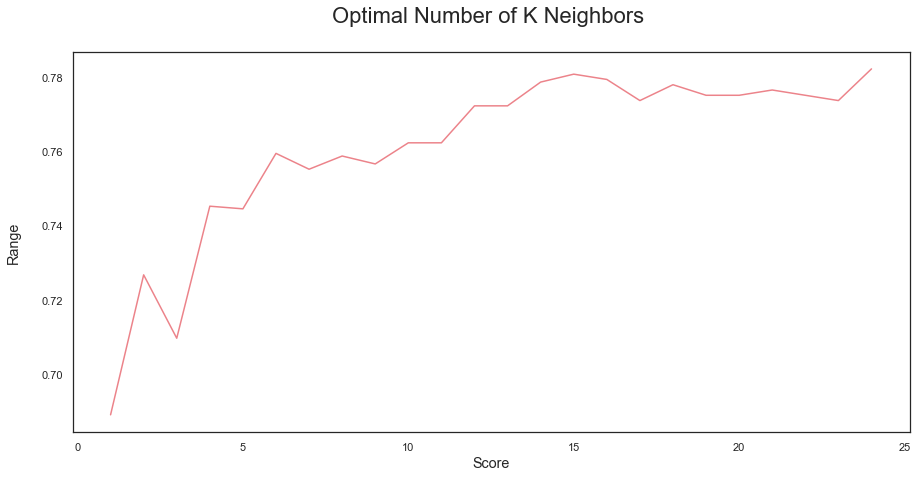

In [264]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    #set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
    fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

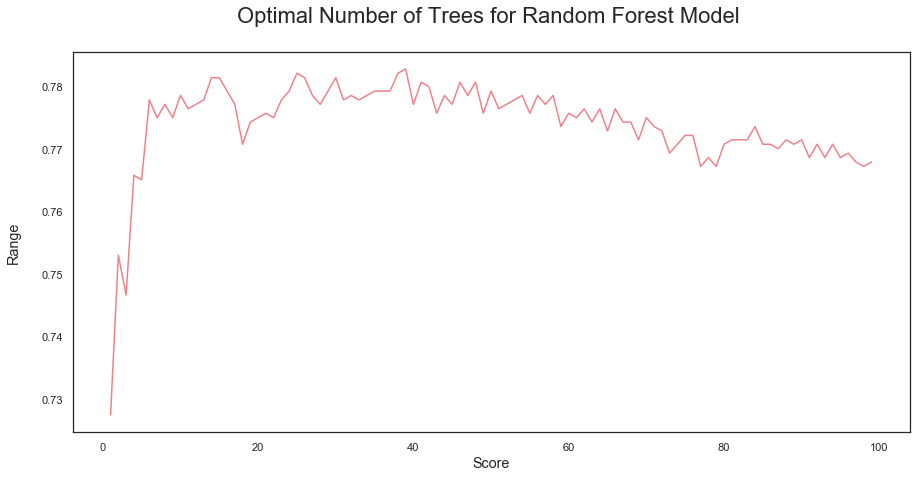

In [266]:
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1)     
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()



In [268]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.800568   0.651466  0.534759  0.587372  0.554631


In [269]:
# Fitting SVM (SVC class) to the Training set
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results y_pred = classifier.predict(X_test)#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision","Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.800568   0.651466  0.534759  0.587372  0.554631
1         SVM (Linear)  0.800568   0.651466  0.534759  0.587372  0.554631


In [270]:
# Fitting KNN to the Training set:
classifier = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred  = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.800568   0.651466  0.534759  0.587372  0.554631
1          SVM (Linear)  0.800568   0.651466  0.534759  0.587372  0.554631
2  K-Nearest Neighbours  0.775018   0.583090  0.534759  0.557880  0.543774


In [271]:
# Fitting Kernel SVM to the Training set:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.800568   0.651466  0.534759  0.587372  0.554631
1          SVM (Linear)  0.800568   0.651466  0.534759  0.587372  0.554631
3            Kernel SVM  0.792051   0.645161  0.481283  0.551302  0.507042
2  K-Nearest Neighbours  0.775018   0.583090  0.534759  0.557880  0.543774


In [272]:
# Fitting Decision Tree to the Training set:classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.800568   0.651466  0.534759  0.587372  0.554631
1          SVM (Linear)  0.800568   0.651466  0.534759  0.587372  0.554631
2            Kernel SVM  0.792051   0.645161  0.481283  0.551302  0.507042
4         Decision Tree  0.792051   0.645161  0.481283  0.551302  0.507042
3  K-Nearest Neighbours  0.775018   0.583090  0.534759  0.557880  0.543774


In [273]:
# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 72,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
#Evaluate results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0   Logistic Regression  0.800568   0.651466  0.534759  0.587372  0.554631
1          SVM (Linear)  0.800568   0.651466  0.534759  0.587372  0.554631
2            Kernel SVM  0.792051   0.645161  0.481283  0.551302  0.507042
3         Decision Tree  0.792051   0.645161  0.481283  0.551302  0.507042
4  K-Nearest Neighbours  0.775018   0.583090  0.534759  0.557880  0.543774
5         Random Forest  0.762952   0.569930  0.435829  0.493939  0.457351


### Section D: Model Evaluation

In [274]:
classifier = LogisticRegression(random_state = 0,penalty = 'l2')
classifier.fit(X_train, y_train)# Predict the Test set results
y_pred = classifier.predict(X_test)#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression',acc, prec, rec, f1, f2]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.800568   0.651466  0.534759  0.587372  0.554631


In [275]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(),accuracies.std() * 2))

Logistic Regression Classifier Accuracy: 0.80 (+/- 0.03)


Text(0.5, 12.5, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

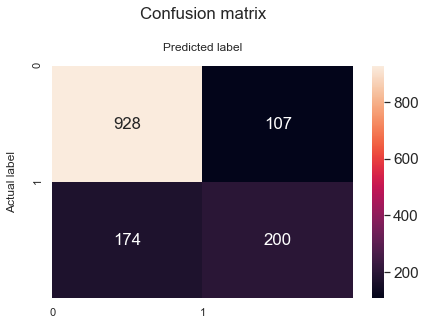

In [278]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')#,cmap="YlGnBu"
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

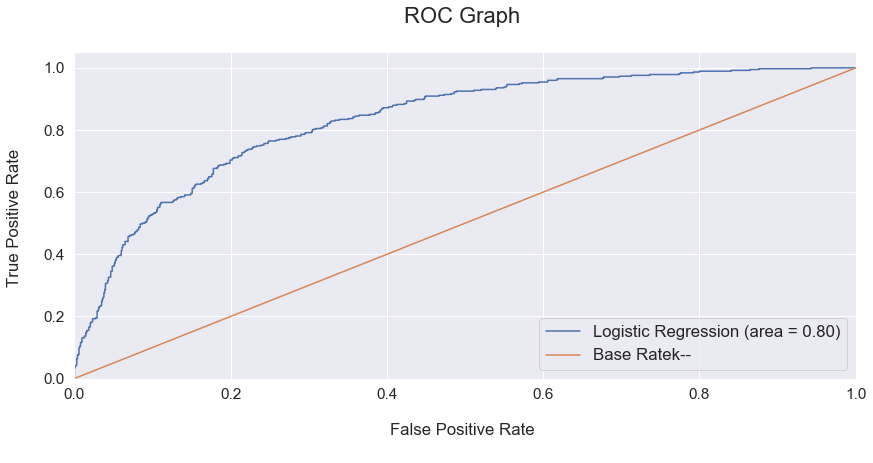

In [284]:
classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))
# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")

plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")

plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")

plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [287]:
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'customerID').columns, columns = ["features"]),pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
12,InternetService_Fiber optic,0.303604
32,Contract_Month-to-month,0.283984
6,PaperlessBilling,0.213590
37,PaymentMethod_Electronic check,0.117929
28,StreamingTV_Yes,0.117040
14,OnlineSecurity_No,0.107732
31,StreamingMovies_Yes,0.106467
23,TechSupport_No,0.106097
10,MultipleLines_Yes,0.078554
1,SeniorCitizen,0.063128


### Section E: Model Improvement

In [290]:
# Round 1:
 
# Select Regularization Method   
import time
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = "balanced_accuracy", cv = 10, n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 88.29 seconds


(0.724240540567911, {'C': 10, 'penalty': 'l2'})

In [292]:
# Round 2:# Select Regularization Method
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = "balanced_accuracy", cv = 10, n_jobs = -1)
t0 = time.time()
lr_classifier  = lr_classifier .fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters

Took 1.08 seconds


(0.7221490455567403, {'C': 0.05, 'penalty': 'l2'})

In [293]:
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
# Predict the Test set resultsy_pred = lr_classifier.predict(X_test)#probability score
y_pred_probs = lr_classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]

### Section F: Future Predictions

[[928 107]
 [174 200]]
Test Data Accuracy: 0.8006


<Figure size 2016x1440 with 0 Axes>

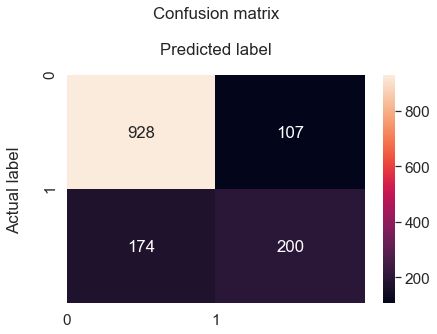

In [296]:
#Revalidate final results with Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
print (cm)
#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])
#visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g') #,cmap="YlGnBu" 
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [297]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)
final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)

      customerID  Churn  predictions  propensity_to_churn(%) Ranking
1689  0274-JKUJR      0            0                   36.45       4
2594  3096-YXENJ      0            0                    7.02       7
58    3957-SQXML      0            0                    1.69       9
3595  2260-USTRB      1            1                   68.49       1
292   2294-SALNE      0            0                   13.38       6
...          ...    ...          ...                     ...     ...
5363  3810-PJUHR      0            0                    0.54      10
4164  7030-FZTFM      0            0                    2.55       9
6880  6976-BWGLQ      0            0                    0.52      10
2085  8290-YWKHZ      1            1                   67.84       1
6395  3058-HJCUY      1            0                   28.69       4

[1409 rows x 5 columns]


In [298]:
filename = 'final_model.model'
i = [lr_classifier]
joblib.dump(i,filename)

['final_model.model']

 b. To construct your JNB you may want to modify the Python script used in class or adapt your code from the one provided at https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa



c. What would you recommend the telecom company to answer the three business questions?


(1) what is the likelihood of an active customer leaving the company? 

C:\Users\Alejandro\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


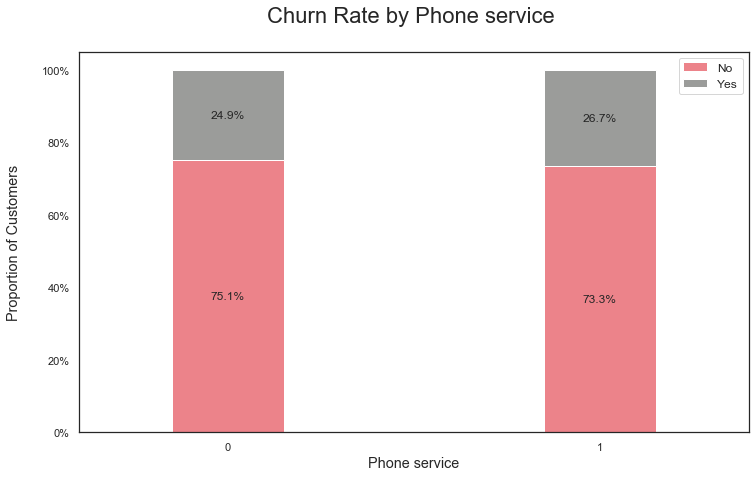

In [159]:
import matplotlib.ticker as mtick
contract_churn = dataset.groupby(['PhoneService','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Phone service\n',horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Phone service \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)

The likelihood of a custumer with an active phone line is of 26.7%

(2) what are key indicators of a customer churn? 

Most Positive Correlations:<br> 
MonthlyCharges     
PaperlessBilling   
SeniorCitizen      

Most Negative Correlations: <br>
tenure
TotalCharges   
Dependents     
         

(3) what retention strategies can be implemented based on the results to diminish prospective customer churn?

Some retention strategies for reducing churn can be: The first one and most obious but not always viable is to reduce monthly charges, but this can not always be a viable option. What can be done is that a discount can be made for the new customers because the ones with less tenure are more likely to churn then we can prorate the cost throughout the years.

### 3. **Panel Data (5 points)**. Please consider the balanced guns panel dataset of 50 US states, plus the District of Columbia (for a total of 51 states), by year for 1977– 1999 that contains information about criminality in the USA. <br>Apply Panel Data Analysis to the attached Guns.csv dataset to determine what kind of panel data method is most appropriate to predict crime in the USA and to answer the “research” question: How does the income affects crime rate? Use the attributes State, Income, Year, and violent.
      



  a. Prepare a Jupiter notebook (JNB) where you explain and analyze the panel data analysis.
        

In [201]:
# Import and preprocess data
import pandas as pd
dataset = pd.read_csv('Guns.csv', usecols = ['state', 'year','income', 'violent'],\
                      index_col = ['state', 'year'])
years = dataset.index.get_level_values('year').to_list()
dataset['year'] = pd.Categorical(years)

In [202]:
# Perform PooledOLS
from linearmodels import PooledOLS
import statsmodels.api as sm
exog = sm.tools.tools.add_constant(dataset['income'])
endog = dataset['violent']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

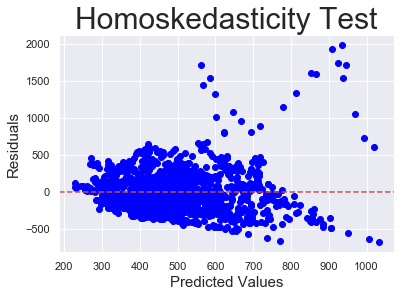

In [203]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [204]:
# 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
pooled_OLS_dataset = pd.concat([dataset, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['year'], axis = 1).fillna(0)
exog = sm.tools.tools.add_constant(dataset['income']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))
# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 200.15502156044568, 'LM p-val': 3.442621728588946e-44, 'F-Stat': 120.35903993735407, 'F p-val': 2.925453555717697e-48}
{'LM-Stat': 110.96166044221745, 'LM p-val': 6.032616972194349e-26, 'F-Stat': 122.34596392437228, 'F p-val': 4.048137598792713e-27}


In [205]:
# 3.B Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

0.08937264851640211


In [206]:
# FE und RE model
from linearmodels import PanelOLS
from linearmodels import RandomEffects
exog = sm.tools.tools.add_constant(dataset['income'])
endog = dataset['violent']
# random effects model
model_re = RandomEffects(endog, exog) 
re_res = model_re.fit() 
# fixed effects model
model_fe = PanelOLS(endog, exog, entity_effects = True) 
fe_res = model_fe.fit() 
#print results
print(re_res)
print(fe_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                violent   R-squared:                        0.1128
Estimator:              RandomEffects   R-squared (Between):              0.1159
No. Observations:                1173   R-squared (Within):               0.1127
Date:                Fri, Apr 09 2021   R-squared (Overall):              0.1156
Time:                        14:35:08   Log-likelihood                   -7109.8
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      148.90
Entities:                          51   P-value                           0.0000
Avg Obs:                       23.000   Distribution:                  F(1,1171)
Min Obs:                       23.000                                           
Max Obs:                       23.000   F-statistic (robust):             148.90
                            

In [215]:
import numpy.linalg as la
from scipy import stats
import numpy as np
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval
hausman_results = hausman(fe_res, re_res) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 9.426371343365807
degrees of freedom: 2
p-Value: 0.008976136961510497


b. To construct your JNB you may modify the Python code provided at the second part of https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8 and follow the four steps explained in the web page.
       

 c. What are the main conclusions of this analysis?

We know that if assumptions of Exogenety, homoskedasticity and non-autorrelation are violated then we should chose FE/RE so based on this we proved that both homoskedasticity, with a p-value less than 0.05 in White-test (3.442621728589391e-44) and Breusch-Pagan-test (6.032616972194746e-26), and non-autorrelation, with a p-value of 0.08937264851640213, are violated. So we have to chose between FE and RE, for this we performed hausman-test which gave a p-value of 0.008976136961544689 with which we can chose the FE model having proven the endogenety in the model

### 4. **Time Series (5 points)**. Consider the Superstore sales dataset which contains four years of sales data 2014-2017. Apply Times Series Analysis to the category “technology” of the superstore sales.
       

a. Prepare a Jupiter notebook (JNB) where you explain and analyze the time series analysis.
       

b. To construct your JNB you may want to modify the Python script used in class or adapt your code from the one provided at https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
       

In [4]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
df = pd.read_excel("Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [6]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

Data Preprocessing

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [8]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [9]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [10]:
y = furniture['Sales'].resample('MS').mean()

In [11]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

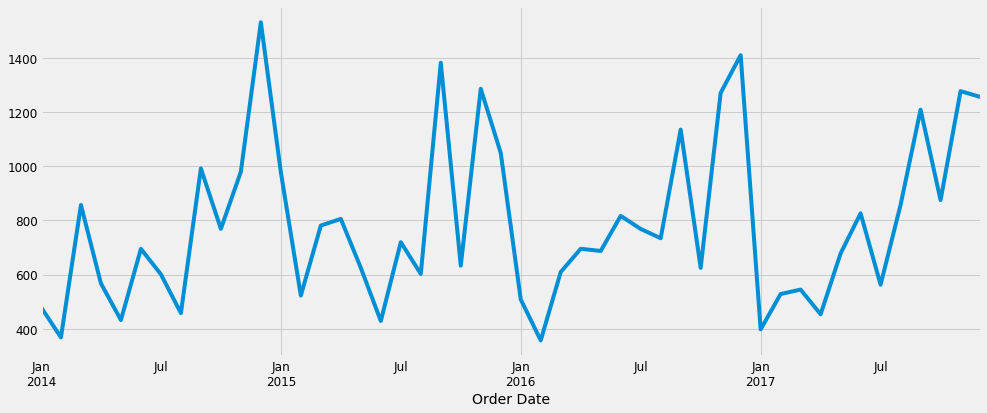

In [12]:
y.plot(figsize=(15, 6))
plt.show()

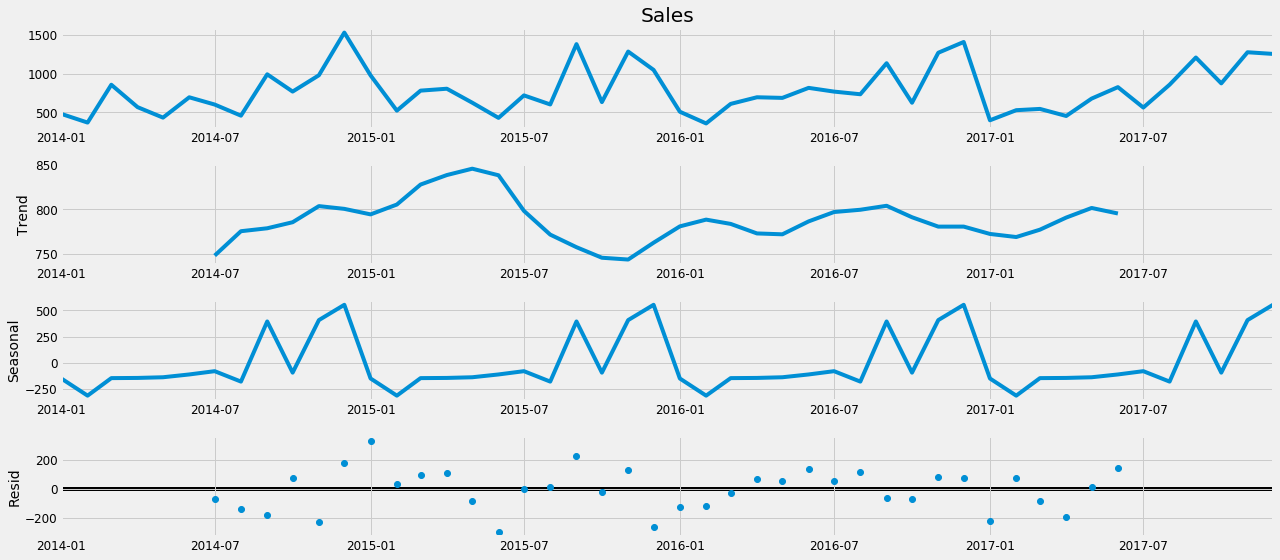

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1446.5593227130305
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793649
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1172.208674145885
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280303003
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2900.357535652858
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091255
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.6261389673288


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.574045803366
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2513.1394870316744
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255765237444
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1250.2320272227237
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.967122816796
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1550.2003231687213
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151445
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176816999
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2683.886393076119
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482932
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.58062333645836
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774427826
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3144.981130223559
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684172994
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461241
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1343.1777877543473
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.2077675160913
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352177


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1243.8088413604426
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084554
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.5842692143882
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.779444218685
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:82073.66352065578
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195814987
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34221939659307
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.5763323876739


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002122138
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.75131881108643
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1205.945960251849
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619096
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.34036587848493


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1269.52639945458
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345443
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992508665
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835024
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:101786.44160210912
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610111
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.38730069394256
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608614
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2651.570039388935
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439553055
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.36610180828967


In [16]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


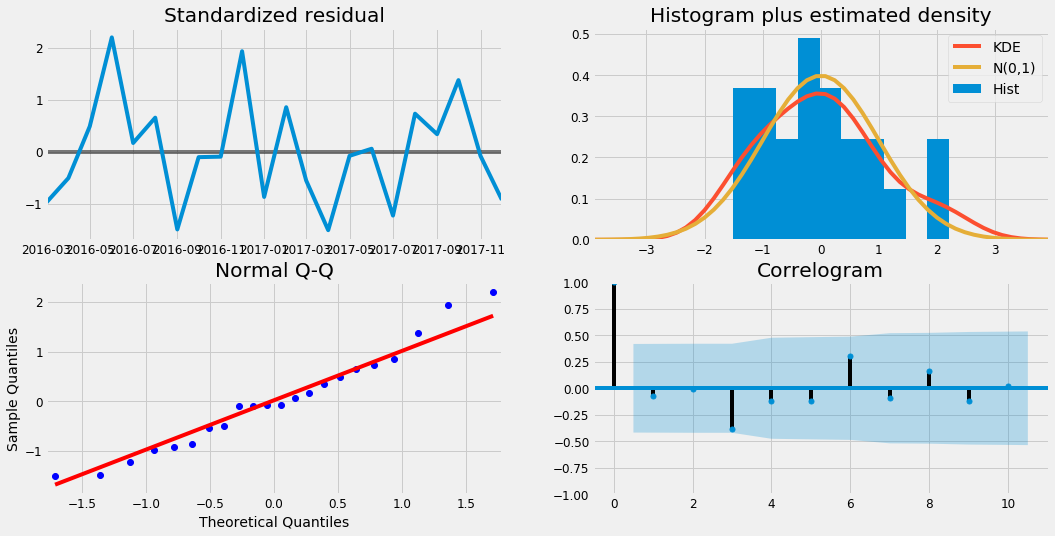

In [17]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

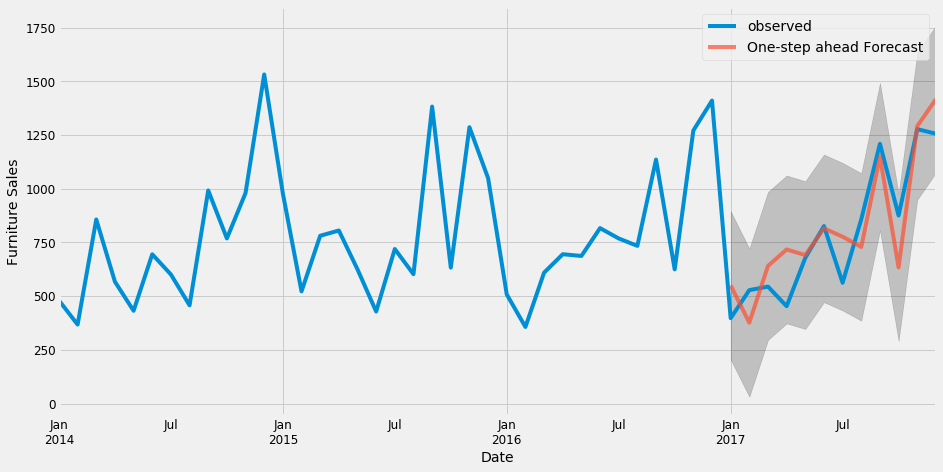

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.58


In [20]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


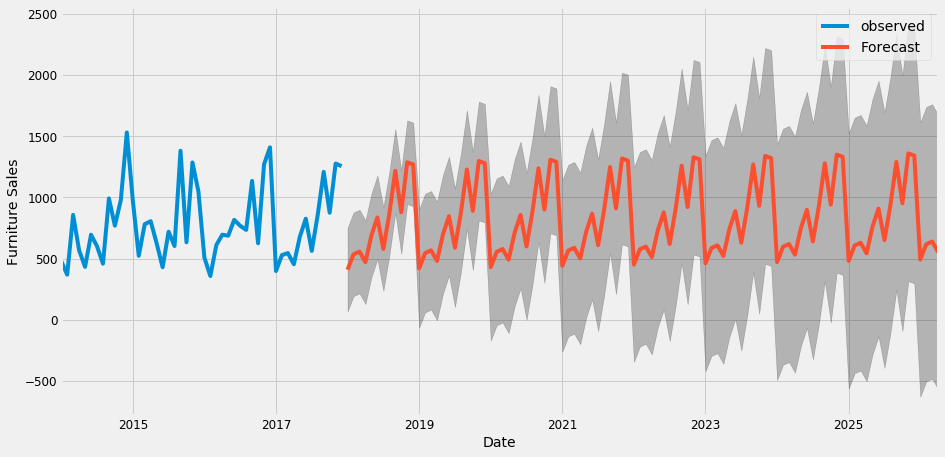

In [21]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [22]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

### Data Exploration

In [23]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


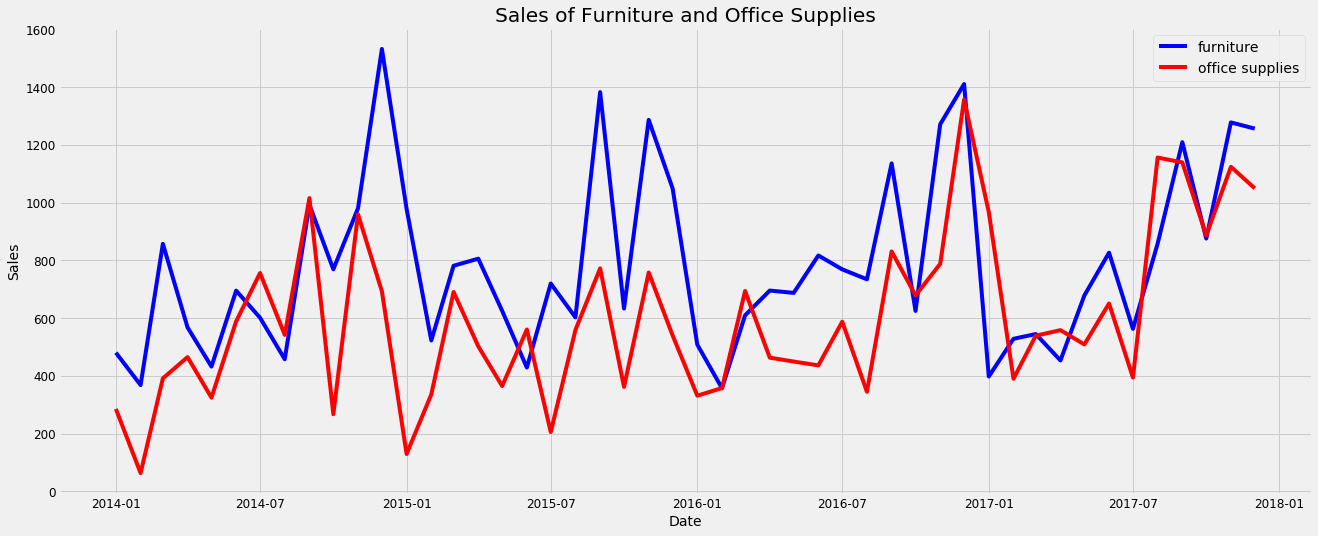

In [24]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [25]:
first_date = df.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-06-09.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

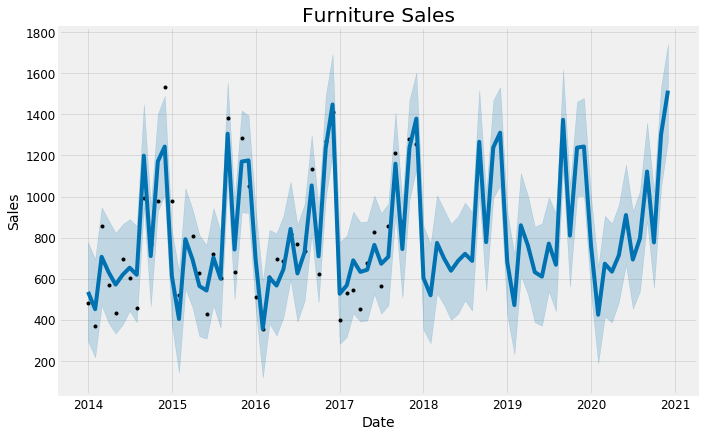

In [26]:
from fbprophet import Prophet
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1296x432 with 0 Axes>

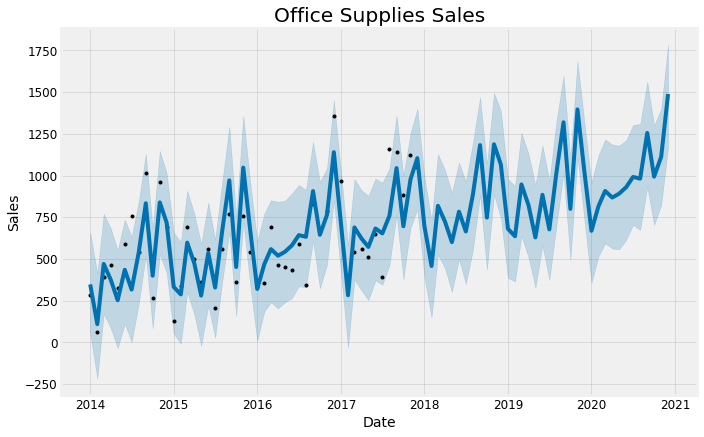

In [27]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

### Compare Forecasts

In [30]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how = 'inner', left_on = 'furniture_ds', right_on = 'office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,294.352311,776.822927,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,216.962297,694.240029,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,469.809887,948.088484,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,383.152758,882.368202,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,332.912657,822.314417,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


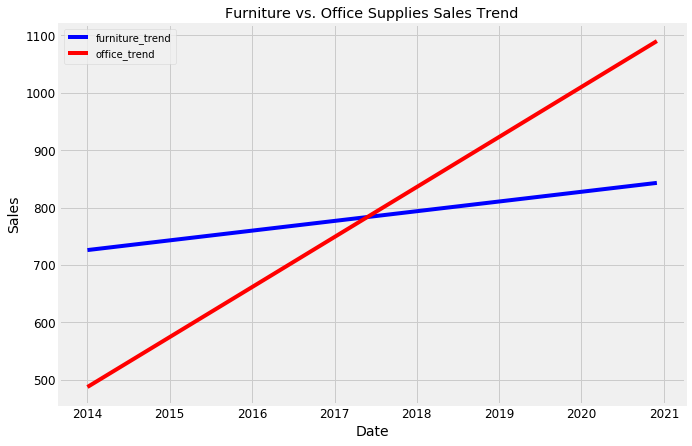

In [43]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Furniture vs. Office Supplies Sales Trend')
plt.legend(['furniture_trend','office_trend']);



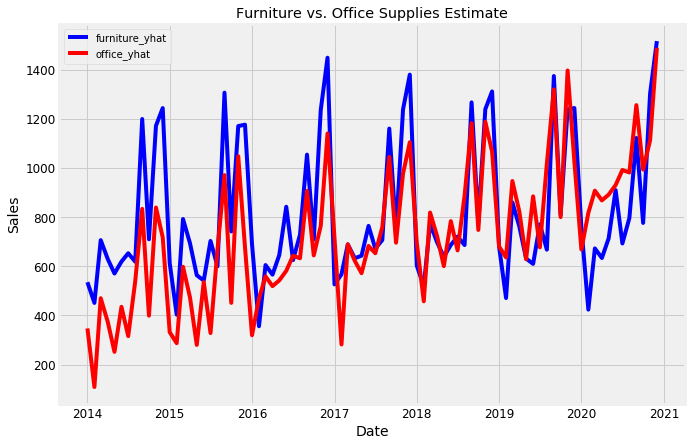

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.legend(['furniture_yhat', 'office_yhat']); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Estimate');

### Trends and Patterns

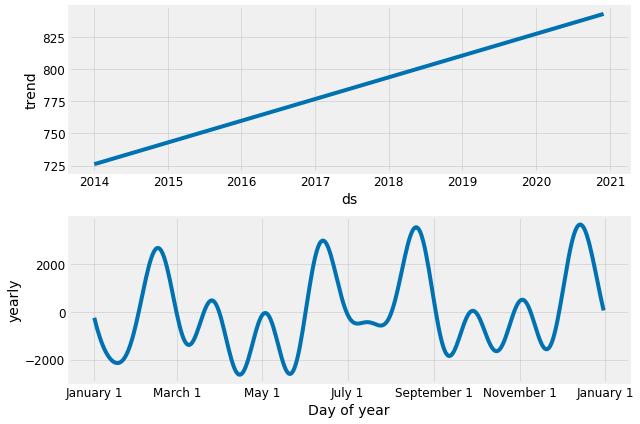

In [48]:
furniture_model.plot_components(furniture_forecast);

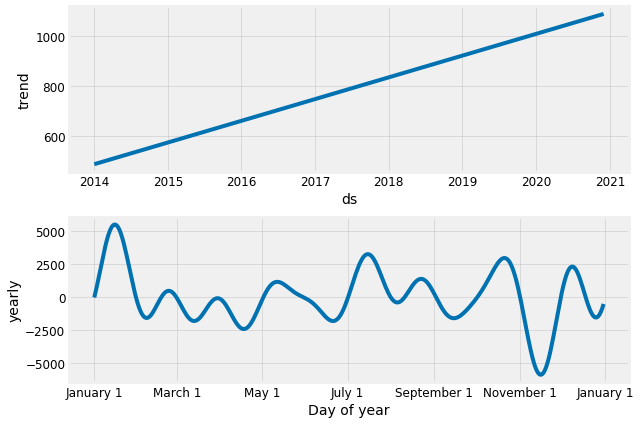

In [49]:
office_model.plot_components(office_forecast);

c. Do sales forecasting of technology sales for year 2018.
       

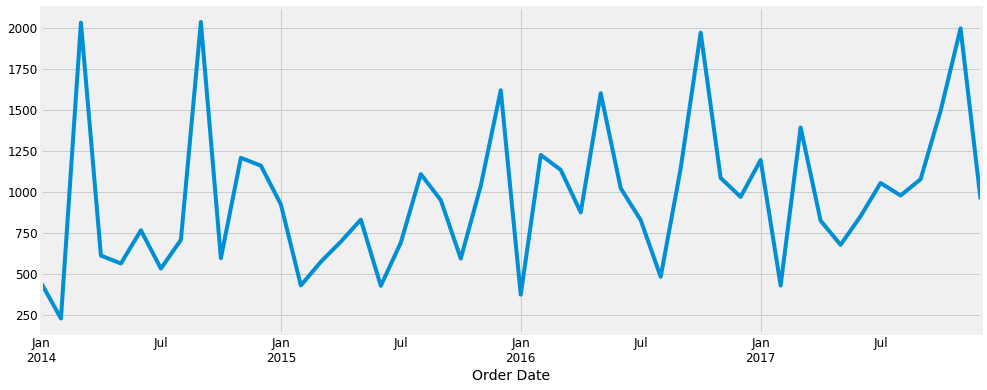

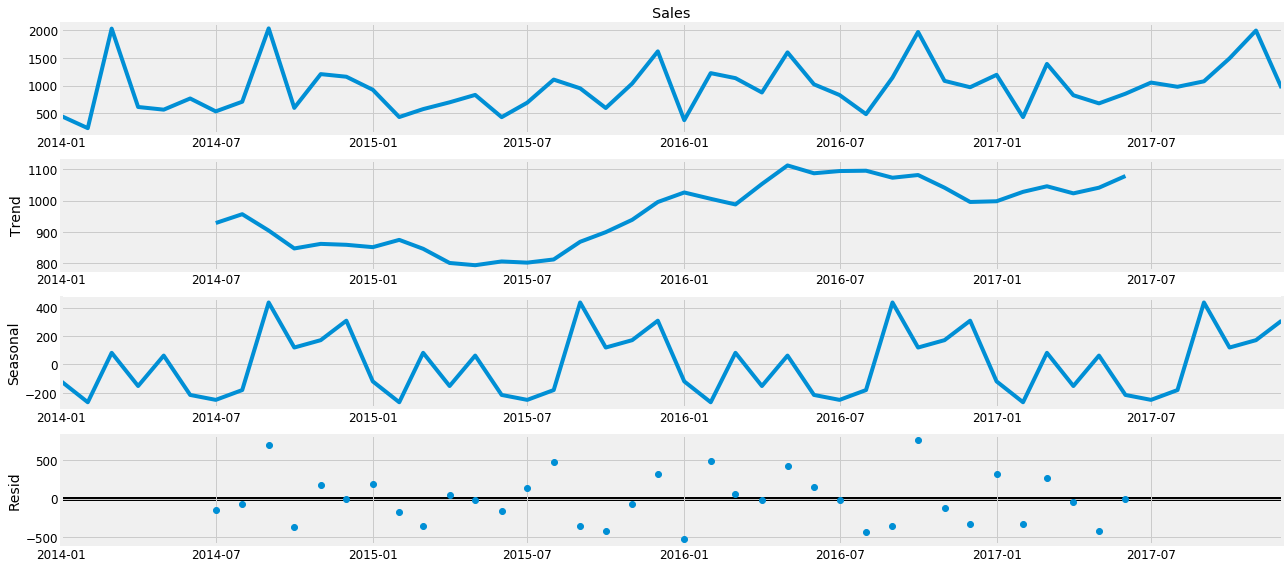

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:791.4891765009955
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1381.0347611064951

C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:549.0156237882128
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:356.4725519397555
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:564.1031529698099

C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1487.9034425622215
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:372.6612068172691
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:357.8845253700102
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:750.8969484750885
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3051.8298780187833
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:535.0489454747435
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:341.1892359670085
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:566.0827904028376
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2875.8349964287036
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:373.8760065868629
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:342.63073634197644
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:729.3478530237927


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1417.9210308851436
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:562.7585881087532
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:355.1666159145536
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:543.3082156228088
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1442.4744068537384
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:377.03544814349607
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:357.14538297555697
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:675.9599897483578
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3170.751365083307
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:517.5329284811334
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:325.1394965646
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:526.5542322434043
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2691.5469979588815
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:359.5230842754364
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:326.87694299709887
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:742.0250351345342


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1645.172866099678
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:550.272134077019
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:358.3250010024644
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:543.2786122758232


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1372.6407565422146
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:359.37687065897023
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:359.6676257509811
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:699.8975570622567
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2628.485372710168
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:536.8995751104102
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:341.736043452866
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:527.7942232914842
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2692.815432312765
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:361.314925797491
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:343.4390168111816
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:717.9677328156988


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1427.3544014674299
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:555.4581770800665
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:352.887846271756
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:522.504250679654


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1357.099387128099
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:355.12595472751764
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:354.8500621585762
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:677.6306925349004
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2607.8156734643567
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:518.790371045406
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:326.70087136572937
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:513.1256895923934


C:\Users\Alejandro\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2624.963534640311
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:343.60373359734376
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:328.3483915565066
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2660      0.249     -1.067      0.286      -0.755       0.223
ma.L1         -1.0001      0.348     -2.870      0.004      -1.683      -0.317
ar.S.L12      -0.5003      0.175     -2.852      0.004      -0.844      -0.157
sigma2      2.243e+05   1.55e-06   1.44e+11      0.000    2.24e+05    2.24e+05


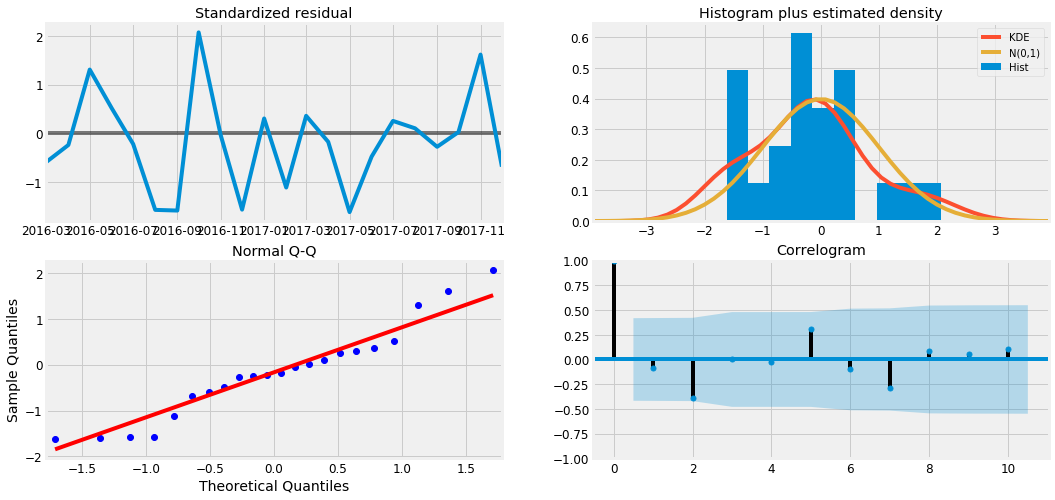

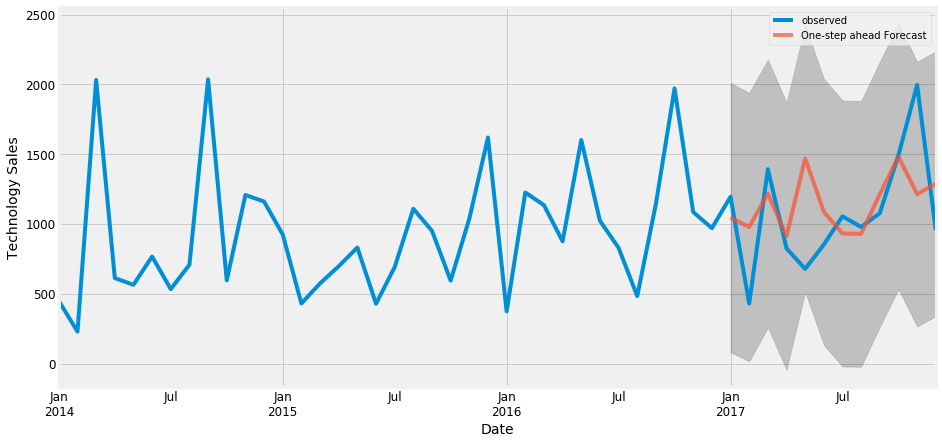

The Mean Squared Error of our forecasts is 150095.64
The Root Mean Squared Error of our forecasts is 387.42


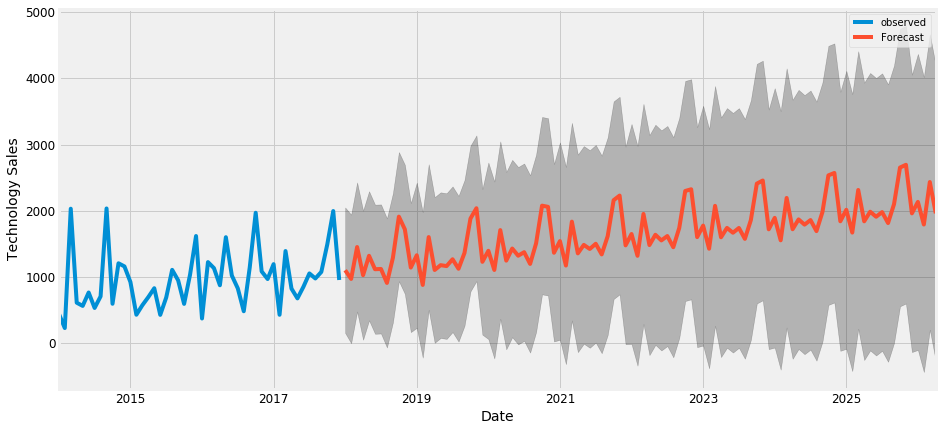

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Office supplies first time produced higher sales than technology is 2014-06-09.


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


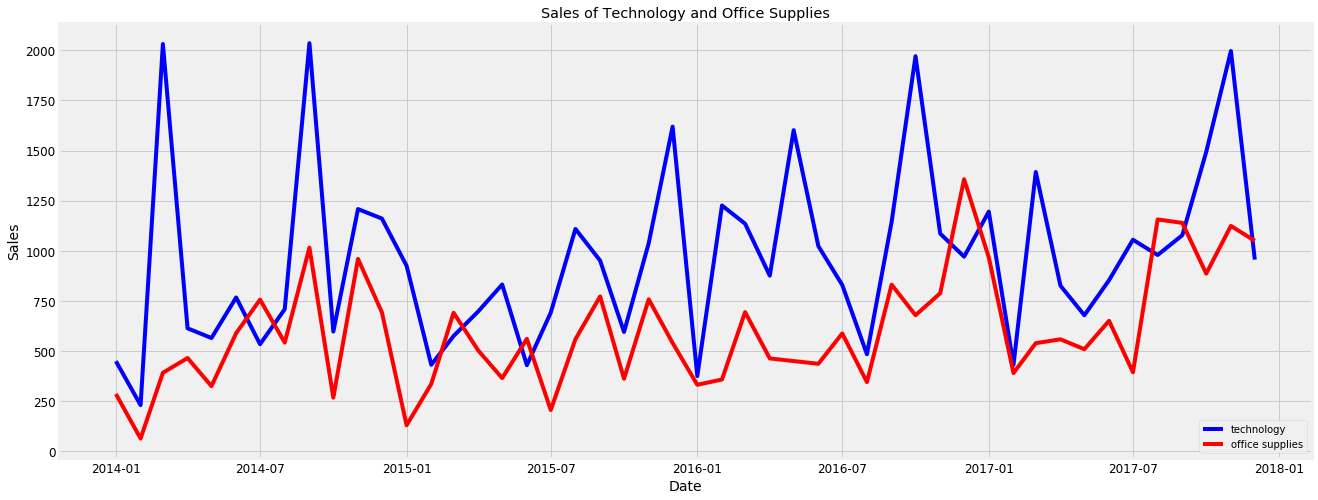

<Figure size 1296x432 with 0 Axes>

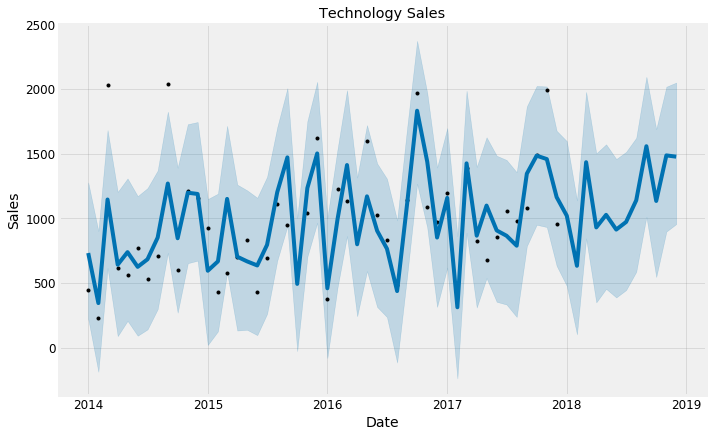

In [51]:
technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')
technology.isnull().sum()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
technology.index
y = technology['Sales'].resample('MS').mean()
y['2017':]
y.plot(figsize=(15, 6))
plt.show()
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1), seasonal_order=(1, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(16, 8))
plt.show()
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()
technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
technology.shape, office.shape
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
technology = technology.sort_values('Order Date')
office = office.sort_values('Order Date')
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
office = office.set_index('Order Date')
y_technology = technology['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales':y_technology.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
store = technology.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'technology_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['technology_sales'], 'b-', label = 'technology')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Technology and Office Supplies')
plt.legend();
first_date = df.loc[np.min(list(np.where(store['office_sales'] > store['technology_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than technology is {}.".format(first_date.date()))
technology = technology.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width=0.95)
technology_model.fit(technology)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)
technology_forecast = technology_model.make_future_dataframe(periods=12, freq='MS')
technology_forecast = technology_model.predict(technology_forecast)
office_forecast = office_model.make_future_dataframe(periods=12, freq='MS')
office_forecast = office_model.predict(office_forecast)
plt.figure(figsize=(18, 6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Technology Sales');


d. Compare technology sales with furniture sales.
      

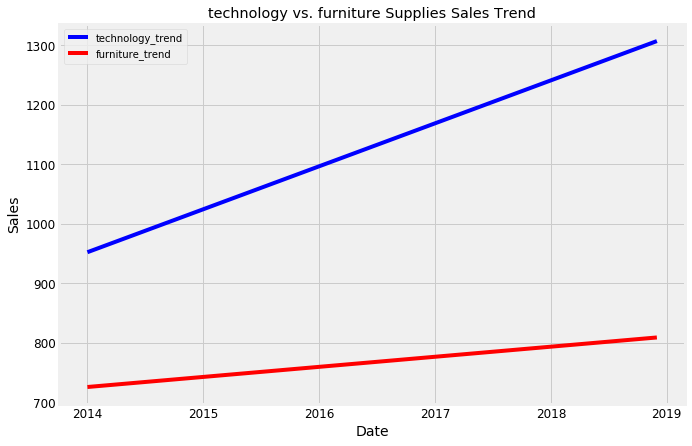

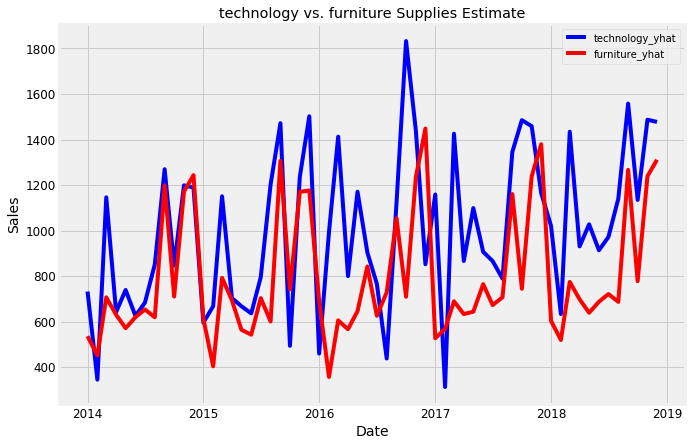

In [54]:
technology_names = ['technology_%s' % column for column in technology_forecast.columns]
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
merge_technology_forecast = technology_forecast.copy()
merge_furniture_forecast = furniture_forecast.copy()
merge_technology_forecast.columns = technology_names
merge_furniture_forecast.columns = furniture_names
forecast = pd.merge(merge_technology_forecast, merge_furniture_forecast, how = 'inner', left_on = 'technology_ds', right_on = 'furniture_ds')
forecast = forecast.rename(columns={'technology_ds': 'Date'}).drop('furniture_ds', axis=1)
forecast.head()
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['technology_trend'], 'b-')
plt.plot(forecast['Date'], forecast['furniture_trend'], 'r-')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('technology vs. furniture Supplies Sales Trend')
plt.legend(['technology_trend','furniture_trend']);
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['technology_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'r-')
plt.legend(['technology_yhat', 'furniture_yhat']); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('technology vs. furniture Supplies Estimate');


e. What are the main conclusions of this analysis?

The forecast of Techonology may not be as accurate as the one of forniture, having a much greater MSE and RMSE. and as we go further in the proyection the error becomes greater. 
For the comparisson of technology and furnitre we are able to see that both share the seasonality and in some parts is stronger than others. What we can also see is that Technology is usually higher because it can be expensive and it can be more oftenly purchased.
We can see that the furniture forecast has a discrete growth having a growth of 100 in sales compared to the growth of technology which is 350. We can also see that the best season of the year for furniture  sales is the second half of the year with two clear peaks dispersed in this second half of the year, and the sales of technology has a good start of the year, then the sales drop until the second half of the year in which we see stronger sales than the ones at the begining of the year, dropping again but going up almost imediately.
